### Importing
[공공데이터포털 :: 국민건강보험공단_건강검진정보 데이터 상세](https://www.data.go.kr/data/15007122/fileData.do)

In [ ]:
!git clone https://github.com/py-why/causal-learn.git
%cd causal-learn
%pip install -e .

In [ ]:
%pip install torch numpy scipy
!git clone https://github.com/xunzheng/notears.git
%cd notears
%pip install -e .

In [ ]:
%pip install pandas ydata-profiling

In [ ]:
import os
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/Dataset/Healthcare DB/'

# df = pd.read_csv(path + '국민건강보험공단_건강검진정보_2023.CSV', encoding='cp949')

In [ ]:
path = '/content/drive/MyDrive/Dataset/Healthcare DB/'

data = pd.DataFrame()
files = os.listdir(path)

for file in files:
    if file.endswith('.CSV'):
        data = pd.concat([data, pd.read_csv(path + file, encoding='cp949')], ignore_index=True)

In [ ]:
data.drop(columns = ['데이터 공개일자'], inplace=True)

first_cols = ['가입자일련번호', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '수축기혈압', '이완기혈압',  '총콜레스테롤', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '구강검진수검여부', ]
second_cols = ['가입자 일련번호', '성별', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',  '수축기 혈압', '이완기 혈압', '총 콜레스테롤', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '구강검진 수검여부', ]

for first_col, second_col in zip(first_cols, second_cols):
    data[f'{first_col}_md'] = data[first_col].combine_first(data[second_col])
    data.drop(columns = [first_col, second_col], inplace=True)

In [ ]:
rename_map = {
    '기준년도': 'year',
    '가입자일련번호_md': 'serial',
    '시도코드': 'region',
    '성별코드_md': 'sex',
    '허리둘레': 'waist',
    '시력(좌)': 'vision_left',
    '시력(우)': 'vision_right',
    '청력(좌)': 'hearing_left',
    '청력(우)': 'hearing_right',
    '식전혈당(공복혈당)': 'fasting_glucose',
    '트리글리세라이드': 'tg',
    '혈색소': 'hemoglobin',
    '요단백': 'urine_prot',
    '혈청크레아티닌': 'serum_creatine',
    '흡연상태': 'smoke',
    '음주여부': 'drink',
    '치아우식증유무': 'dental_caries',
    '결손치 유무': 'missing_teeth',
    '치아마모증유무': 'tooth_wear',
    '제3대구치(사랑니) 이상': 'tooth_abnormality',
    '치석': 'tartar',
    '연령대코드(5세단위)_md': 'age_group',
    '신장(5cm단위)_md': 'height',
    '체중(5kg단위)_md': 'weight',
    '수축기혈압_md': 'sbp',
    '이완기혈압_md': 'dbp',
    '총콜레스테롤_md': 'total_chol',
    'HDL콜레스테롤_md': 'hdl_chol',
    'LDL콜레스테롤_md': 'ldl_chol',
    '혈청지오티(AST)_md': 'ast',
    '혈청지피티(ALT)_md': 'alt',
    '감마지티피_md': 'gamma_gtp',
    '구강검진수검여부_md': 'oral_exam'
}

data.rename(columns = rename_map, inplace=True)

In [ ]:
data = data[[
    'year', 'serial', 'region', 'sex', 'age_group', 'height', 'weight', 'waist',
    'vision_left', 'vision_right', 'hearing_left', 'hearing_right',
    'sbp', 'dbp', 'fasting_glucose', 'total_chol', 'tg', 'hdl_chol', 'ldl_chol',
    'hemoglobin', 'urine_prot', 'serum_creatine', 'ast', 'alt', 'gamma_gtp',
    'smoke', 'drink', 'oral_exam', 'dental_caries', 'missing_teeth', 'tooth_wear',
    'tooth_abnormality', 'tartar'
]]

In [ ]:
data.year.value_counts()

### Info
| No | 항목명 | 설명 | 표현형식/단위 | 예시 | 영문 변수명 |
|:--:|:-----|:-----|:-------------|:----|:-----------|
| 1 | 기준년도 | 해당 정보의 기준년도 | YYYY | 2009 | year |
| 2 | 가입자일련번호 | 가입자에 부여한 일련번호 (1~1,000,000) | N | 1 | serial |
| 3 | 성별코드 | 성별: 1(남자), 2(여자) | N | 1 | sex |
| 4 | 연령대코드(5세 단위) | 5세 단위 그룹화, 85세 이상은 85+ | N | 11 | age_group |
| 5 | 시도코드 | 수진자 거주지 시도 코드 | N | 26 | region |
| 6 | 신장(5cm 단위) | 키를 5cm 단위로 기록 | N/cm | 140 | height |
| 7 | 체중(5kg 단위) | 몸무게를 5kg 단위로 기록 | N/kg | 45 | weight |
| 8 | 허리둘레 | 허리둘레 (2008년부터 추가) | N/cm | 82 | waist |
| 9 | 시력(좌) | 좌측 눈 시력 (0.1~2.5, 실명=9.9) | N | 0.5 | vision_left |
| 10 | 시력(우) | 우측 눈 시력 (0.1~2.5, 실명=9.9) | N | 0.5 | vision_right |
| 11 | 청력(좌) | 좌측 귀 청력: 1(정상), 2(비정상) | N | 1 | hearing_left |
| 12 | 청력(우) | 우측 귀 청력: 1(정상), 2(비정상) | N | 1 | hearing_right |
| 13 | 수축기혈압 | 심장 수축 시 혈압 | N/mmHg | 140 | sbp |
| 14 | 이완기혈압 | 심장 이완 시 혈압 | N/mmHg | 81 | dbp |
| 15 | 식전혈당(공복혈당) | 식사 전 혈당 수치 | N/mg/dL | 94 | fasting_glucose |
| 16 | 총콜레스테롤 | 혈청 내 총 콜레스테롤 | N/mg/dL | 164 | total_chol |
| 17 | 트리글리세라이드 | 중성지방 수치 | N/mg/dL | 94 | tg |
| 18 | HDL콜레스테롤 | 고밀도 리포단백 콜레스테롤 | N/mg/dL | 45 | hdl_chol |
| 19 | LDL콜레스테롤 | 저밀도 리포단백 콜레스테롤 | N/mg/dL | 50 or 130 | ldl_chol |
| 20 | 혈색소 | 산소 운반 단백질 | N/g/dL | 15.3984 | hemoglobin |
| 21 | 요단백 | 소변 내 단백질 여부: 1(-) ~ 6(+4) | N | 1 | urine_prot |
| 22 | 혈청크레아티닌 | 신장 기능 지표 | N/mg/dL | 0.8 | serum_creatine |
| 23 | 혈청지오티(AST) | 간, 심장, 신장 등 세포 손상 지표 | N/IU/L | 12 | ast |
| 24 | 혈청지피티(ALT) | 간세포 손상 지표 | N/IU/L | 15 | alt |
| 25 | 감마지티피 | 담관/간 기능 지표 | N/IU/L | 19 or 114 | gamma_gtp |
| 26 | 흡연상태 | 1(비흡연), 2(금연), 3(현재 흡연) | N | 1 | smoke |
| 27 | 음주여부 | 0(비음주), 1(음주) | N | 1 | drink |
| 28 | 구강검진 수검여부 | 구강검진 여부: 0(미수검), 1(수검) | N | 1 | oral_exam |
| 29 | 치아우식증유무 | 충치 여부: 0(없음), 1(있음) | N | 1 | dental_caries |
| 30 | 결손치유무 | 결손치 여부: 0(없음), 1(있음) (※2009년부터 제외) | N | 1 | missing_teeth |
| 31 | 치아마모증유무 | 치아 마모 여부: 0(없음), 1(있음) (※2014년부터 제외) | N | 1 | tooth_wear |
| 32 | 제3대구치(사랑니)이상 | 사랑니 이상 여부: 0(없음), 1(있음) (※2014년부터 제외) | N | 1 | tooth_abnormality |
| 33 | 치석 | 치석 여부: 0(없음), 1(있음) | N | 1 | tartar |


In [ ]:
data.age_group.value_counts()

In [ ]:
data.head()

In [ ]:
round(data.isna().sum() / len(data) * 100, 2)

🚫 missing_teeth(결손치 유무), tooth_wear(치아 마모증 유무), tooth_abnormality(제3대구치(사랑니) 이상) 변수는  
null 컬럼이므로 데이터셋에서 제외한다.

In [ ]:
data.drop(columns = ['missing_teeth', 'tooth_wear', 'tooth_abnormality'], inplace=True)

🚫 시력 검사, 청력 검사, 구강 검사 결과는 연구 주제 감마 지티피와는 연관이 없을 것으로 제외한다.

In [ ]:
data.drop(columns = ['vision_left', 'vision_right', 'hearing_left', 'hearing_right', 'oral_exam', 'dental_caries', 'tartar'], inplace=True)

🚫 year == 2023 단일 값의 열은 분석에 불필요할 것이므로 제외한다.

In [ ]:
data.drop(columns = ['year'], inplace=True)

In [ ]:
# profile = ProfileReport(df, title="Health Checkup Dataset Profiling Report", explorative=True)
# profile.to_file("health_dataset_profile.html")
# profile.to_notebook_iframe()

### Missing Check
    - 만 25세 이상의 성인이 아님. (검진자료 한계)

    - γ-GTP 수치가 기록되어 있지 않음.
    - fasing glucose 수치가 기록되어 있지 않음.
    - sbp, dbp 수치가 기록되어 있지 않음.
       (위 세 변수의 결측률은 0.57-0.58%이며, 이는 MCAR으로 간주하여 결측을 단순 drop하여도 문제가 없다고 판단)

In [ ]:
round(data.loc[data.gamma_gtp.isna()].describe(include='all'), 0)

In [ ]:
# 그룹별 평균 차이 계산
group_stats = {}
for col in ['gamma_gtp', 'fasting_glucose', 'sbp', 'dbp']:
    df_temp = data.copy()
    df_temp['missing_flag'] = df_temp[col].isnull()
    stats = df_temp.groupby('missing_flag').mean(numeric_only=True)
    group_stats[col] = stats.drop(columns=[col], errors='ignore')

# group_stats를 보기 좋게 하나의 DataFrame으로 합치기
summary_list = []
for var_name, stat_df in group_stats.items():
    stat_df = stat_df.copy()
    stat_df['variable_with_missing'] = var_name
    stat_df['missing_flag'] = stat_df.index
    summary_list.append(stat_df.reset_index(drop=True))

# 최종 DataFrame 생성
summary_df = pd.concat(summary_list, axis=0, ignore_index=True)

# 열 순서 재정렬
cols = ['variable_with_missing', 'missing_flag'] + [col for col in summary_df.columns if col not in ['variable_with_missing', 'missing_flag']]
summary_df = round(summary_df[cols], 1)

In [ ]:
# 네 변수 중 NaN인 개수 계산
df_temp[['gamma_gtp', 'fasting_glucose', 'sbp', 'dbp']].isna().sum(axis=1).value_counts().sort_index()

In [ ]:
from scipy.stats import mannwhitneyu, chi2_contingency
import numpy as np
import pandas as pd

# 설정
target_vars = df_temp.columns.tolist()
cat_vars = ['sex', 'smoke', 'drink']
results = []

# 분석
for target in target_vars:
    df_temp['missing_flag'] = df_temp[target].isnull()

    for col in df_temp.columns:
        if col == target or col == 'missing_flag':
            continue

        n_non_missing = df_temp[df_temp['missing_flag'] == False][col].dropna().shape[0]
        n_missing = df_temp[df_temp['missing_flag'] == True][col].dropna().shape[0]

        if col in cat_vars:
            contingency_table = pd.crosstab(df_temp['missing_flag'], df_temp[col])
            if contingency_table.shape[0] == 2:
                chi2, p, _, _ = chi2_contingency(contingency_table, correction=False)
                # Cramer's V 계산
                n = contingency_table.sum().sum()
                phi2 = chi2 / n
                r, k = contingency_table.shape
                cramers_v = np.sqrt(phi2 / min(k-1, r-1)) if min(k-1, r-1) > 0 else np.nan
            else:
                p = np.nan
                cramers_v = np.nan

            levels = df_temp[col].dropna().unique()

            for level in sorted(levels):
                compared_var_name = f"{col} [{level}]"

                p1 = df_temp[(df_temp['missing_flag'] == False) & (df_temp[col] == level)].shape[0] / n_non_missing if n_non_missing > 0 else np.nan
                p2 = df_temp[(df_temp['missing_flag'] == True) & (df_temp[col] == level)].shape[0] / n_missing if n_missing > 0 else np.nan

                perc_non_missing = p1 * 100 if not np.isnan(p1) else np.nan
                perc_missing = p2 * 100 if not np.isnan(p2) else np.nan

                summary_non_missing = f"{perc_non_missing:.1f}%" if not np.isnan(perc_non_missing) else "NA"
                summary_missing = f"{perc_missing:.1f}%" if not np.isnan(perc_missing) else "NA"

                # SMD for proportion
                pooled_var = (p1 * (1 - p1) + p2 * (1 - p2)) / 2 if not (np.isnan(p1) or np.isnan(p2)) else np.nan
                smd = (p1 - p2) / np.sqrt(pooled_var) if pooled_var and pooled_var > 0 else np.nan

                results.append({
                    'target_variable': target,
                    'compared_variable': compared_var_name,
                    'non_missing (n)': f"{summary_non_missing} ({n_non_missing:,})",
                    'missing (n)': f"{summary_missing} ({n_missing:,})",
                    'p-value': "<0.001" if (not np.isnan(p) and p < 0.001) else (f"{p:.3f}" if not np.isnan(p) else "NA"),
                    'effect size': f"{cramers_v:.3f}" if not np.isnan(cramers_v) else "NA",
                    'SMD': f"{smd:.3f}" if not np.isnan(smd) else "NA"
                })

        else:
            group1 = df_temp[df_temp['missing_flag'] == False][col].dropna()
            group2 = df_temp[df_temp['missing_flag'] == True][col].dropna()
            if len(group1) > 0 and len(group2) > 0:
                stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
                # Rank biserial correlation
                n1, n2 = len(group1), len(group2)
                rank_biserial = (2 * stat) / (n1 * n2) - 1

                # SMD 계산
                m1, m2 = group1.mean(), group2.mean()
                s1, s2 = group1.std(), group2.std()
                pooled_sd = np.sqrt((s1 ** 2 + s2 ** 2) / 2)
                smd = (m1 - m2) / pooled_sd if pooled_sd > 0 else np.nan
            else:
                p = np.nan
                rank_biserial = np.nan
                m1, m2, smd = np.nan, np.nan, np.nan

            summary_non_missing = f"{m1:.1f}" if not np.isnan(m1) else "NA"
            summary_missing = f"{m2:.1f}" if not np.isnan(m2) else "NA"

            results.append({
                'target_variable': target,
                'compared_variable': col,
                'non_missing (n)': f"{summary_non_missing} ({n_non_missing:,})",
                'missing (n)': f"{summary_missing} ({n_missing:,})",
                'p-value': "<0.001" if (not np.isnan(p) and p < 0.001) else (f"{p:.3f}" if not np.isnan(p) else "NA"),
                'effect size': f"{rank_biserial:.3f}" if not np.isnan(rank_biserial) else "NA",
                'SMD': f"{smd:.3f}" if not np.isnan(smd) else "NA"
            })

    df_temp.drop(columns='missing_flag', inplace=True)

# 결과 데이터프레임 생성
final_df = pd.DataFrame(results)

In [ ]:
final_df = pd.DataFrame(results)

🚫 gamma gtp missing에서 남성의 비율이 37.2% 여성의 비율이 62.8%  
🚫 gamma gtp missing에서 나이 분포가 non missing 보다 높은 편

In [ ]:
final_df[final_df['target_variable'] == 'gamma_gtp']

🚫
(effect_size 0.5 이상을 유의한 차이로 보았을 때)
gamma_gpt는 고령(75세)에서 결측이 많이 발생,  
작은 신장, 적은 체중, 작은 허리둘레에서 많이 발생 (이건 고령의 특성이 반영되었겠다)  
non-drinker에서 많이 발생(이 또한 고령의 특성일 수 있으나, non-drink 비교적 압도적임)

gamma_gtp 결측 시, total_chol, tg, hdl_chol, ldl_chol, serum_creatine, ast, alt는 전부 결측이다.  
hemoglobin, urine_prot 또한 대부분이 결측

In [ ]:
final_df[final_df['target_variable'] == 'total_chol']

In [ ]:
data.isna().sum() / len(data) * 100

⭐ 결측이 0.57-0.58%에 달하는 gamma_gtp, fasting_glucose, sbp, dbp는 exclusion criteria로 포함. (단순 행 제거)  
⭐ 결측이 60%에 달하는 행들, MAR -> multiple imputation



In [ ]:
final_df[final_df['target_variable'] == 'gamma_gtp']

### Inclusion Criteria
    - 직장가입자와 20세 이상의 피부양자, 세대주인 지역가입자와 20세 이상의 지역가입자 중
    - 일반건강검진 수검이력이 있는 연도별 수진자 100만 명 무작위 선정
### Exclusion Criteria
    - 고령 제외 (cut-off를 어떻게?)

### EDA

In [ ]:
df_plt = data.head(100000)

In [ ]:
df_plt.drop(columns = ['serial'], inplace=True)

In [ ]:
cat_cols = []
num_cols = []

for col in df_plt.columns:
    if df_plt[col].nunique() <= 5:
        cat_cols.append(col)
    else:
        num_cols.append(col)

print("categorical columns : ", cat_cols, f"({len(cat_cols)}개)")
print("numerical columns : ", num_cols, f"({len(num_cols)}개)")

#### Univariable EDA

In [ ]:
cat_maps = {
    'sex' :  {1: 'Men', 2: 'Women'},
    'smoke' : {1: "Non", 2: "Ex", 3: "Current"},
    'drink' : {0: "Non-drinker", 1: "Drinker"},
}

for col in cat_cols:
    if col in df_plt.columns:
        df_plt[col] = df_plt[col].map(cat_maps[col]).fillna("Missing")

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# --- 기본 설정 ---
total_plots = len(cat_cols)
cols = 3
rows = (total_plots // cols) + int(total_plots % cols != 0)

fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[""] * total_plots,  # 서브플롯 제목 삭제
    vertical_spacing=0.15,
    horizontal_spacing=0.08
)

# --- 변수별 히스토그램 ---
for i, var in enumerate(cat_cols):
    categories = list(df_plt[var].astype(str).value_counts().sort_values(ascending=False).index)
    row = (i // cols) + 1
    col = (i % cols) + 1

    # 카운트 및 퍼센트 계산
    counts = df_plt[var].value_counts(dropna=True)
    percentages = round(counts / counts.sum() * 100, 2)
    # categories 순서에 맞게 카운트와 퍼센트 재정렬
    counts = [counts[cat] for cat in categories]
    percentages = [percentages[cat] for cat in categories]
    percent_text = [
        '<0.01%' if p < 0.01 else (f'{p:.1f}%' if p >= 1 else f'{p:.2f}%')
        for p in percentages
    ]

    df_plt[var] = pd.Categorical(df_plt[var], categories=categories, ordered=True)

    bar = go.Bar(
        x=categories,
        y=counts,
        text=percent_text,
        textposition='auto',
        name=var,
        marker=dict(color='#1f77b4')
    )

    bar.showlegend = False
    bar.texttemplate = '%{text}'
    bar.textposition = 'auto'
    bar.textfont = dict(family="Times New Roman", size=11)
    fig.add_trace(bar, row=row, col=col)

    # x축 설정: 모든 카테고리 레이블 명시적으로 지정
    fig.update_xaxes(
        title_text=var.replace('_', ' ').capitalize(),  # 제목 포맷
        row=row, col=col,
        showgrid=True,
        gridcolor='#D6DBDF',
        zeroline=False,
        linecolor='#85929E',
        tickfont=dict(family="Times New Roman", size=12),
        title_font=dict(family="Times New Roman", size=14, color="black"),
        title_standoff=10,
        tickmode='array',  # 틱 배열로 설정
        tickvals=list(range(len(categories))),  # 틱 위치 (0, 1, 2, ...)
        ticktext=categories,  # 카테고리 레이블
        range=[-0.5, len(categories) - 0.5],  # x축 범위 제한
        automargin=True  # 레이블 축약 방지
    )

# --- y축 설정 ---
fig.update_yaxes(
    title_text="Count",
    showgrid=True,
    gridcolor='#D6DBDF',
    zeroline=True,
    linecolor='#85929E',
    tickfont=dict(family="Times New Roman", size=12),
    title_standoff=5
)

# --- 전체 레이아웃 ---
fig.update_layout(
    height=300 * rows,
    width=300 * cols,
    title_text="<b>Univariable EDA: Distribution of Categorical Variables</b>",
    plot_bgcolor='#F2F3F4',
    font=dict(family="Times New Roman"),
    margin=dict(l=50, r=20, t=80, b=50),
    title=dict(font=dict(size=26)),
    showlegend=False
)

fig.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

# --- 기본 설정 ---
total_plots = len(num_cols)
cols = 4
rows = (total_plots // cols) + int(total_plots % cols != 0)

fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[""] * total_plots,  # 서브플롯 제목 삭제
    vertical_spacing=0.05,
    horizontal_spacing=0.06  # 간격 축소
)

# --- 변수별 히스토그램 ---
for i, var in enumerate(num_cols):
    row = (i // cols) + 1
    col = (i % cols) + 1

    # 데이터 준비 (결측값 제거)
    df_plt_dn = df_plt[var].dropna()

    # 히스토그램 생성
    hist = go.Histogram(
        x=df_plt_dn,
        histfunc='count',
        name=var,
        marker=dict(color='#1f77b4'),
        opacity=0.6
    )

    # 히스토그램 설정
    hist.showlegend = False
    fig.add_trace(hist, row=row, col=col)

    # x축 범위 계산 및 설정
    data_min = df_plt_dn.min()
    data_max = df_plt_dn.max()
    padding = (data_max - data_min) * 0.05  # 범위의 5% 패딩 추가
    x_range = [data_min - padding, data_max + padding]

    # x축 설정
    fig.update_xaxes(
        title_text=var.replace('_', ' ').capitalize(),  # 제목 포맷
        row=row, col=col,
        showgrid=True,
        gridcolor='#D6DBDF',
        zeroline=False,
        linecolor='#85929E',
        tickfont=dict(family="Times New Roman", size=12),
        title_font=dict(family="Times New Roman", size=14, color="black"),
        title_standoff=10,
        automargin=True,
        range=x_range  # x축 범위 명시적 설정
    )

    # y축 설정
    fig.update_yaxes(
        title_text="Count",
        showgrid=True,
        gridcolor='#D6DBDF',
        zeroline=True,
        linecolor='#85929E',
        tickfont=dict(family="Times New Roman", size=12),
        title_standoff=5,
        row=row, col=col
    )

# --- 전체 레이아웃 ---
fig.update_layout(
    height=250 * rows,
    width=cols * 300,
    title_text="<b>Univariable EDA: Distribution of Numerical Variables</b>",
    plot_bgcolor='#F2F3F4',
    font=dict(family="Times New Roman"),
    margin=dict(l=40, r=20, t=80, b=50),
    title=dict(font=dict(size=26)),
    showlegend=False
)

fig.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

# --- 기본 설정 ---
total_plots = len(num_cols)
cols = 4
rows = (total_plots // cols) + int(total_plots % cols != 0)

# 서브플롯 생성
fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[""] * total_plots,  # 서브플롯 제목 삭제
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
    shared_yaxes=True  # y축 공유
)

# --- 변수별 박스플롯 ---
for i, var in enumerate(num_cols):
    row = (i // cols) + 1
    col = (i % cols) + 1

    # 데이터 준비 (결측값 제거)
    df_plt_dn = df_plt[var].dropna()

    # 데이터가 있는 경우에만 박스플롯 생성
    if len(df_plt_dn) > 0:
        # 박스플롯 생성
        box = go.Box(
            x=df_plt_dn,  # 가로 박스플롯
            y=[0] * len(df_plt_dn),  # y축에 고정된 값 (단일 박스 위치)
            name=var,
            marker=dict(color='#1f77b4'),
            line=dict(color='#1f77b4'),
            boxpoints='outliers',
            jitter=0.3,
            pointpos=0,  # 이상치 점을 박스 중앙에 배치
            orientation='h',  # 가로 박스플롯
            opacity=0.8
        )

        # 박스플롯 설정
        box.showlegend = False  # 범례 숨김
        fig.add_trace(box, row=row, col=col)

    # x축 설정
    fig.update_xaxes(
        title_text=var.replace('_', ' ').capitalize(),  # x축에 변수명 표시
        row=row, col=col,
        showgrid=True,
        gridcolor='#D6DBDF',
        zeroline=False,
        linecolor='#85929E',
        tickfont=dict(family="Times New Roman", size=12),
        title_font=dict(family="Times New Roman", size=14, color="black"),
        title_standoff=10,
        automargin=True
    )

    # y축 설정
    fig.update_yaxes(
        title_text="",  # y축 제목 제거
        showgrid=True,
        gridcolor='#D6DBDF',
        zeroline=False,
        linecolor='#85929E',
        tickfont=dict(family="Times New Roman", size=12),
        title_standoff=5,
        showticklabels=False,  # y축 틱 레이블 제거
        row=row, col=col
    )

# 모든 y축 제목과 틱 레이블 제거
for axis in fig.layout:
    if axis.startswith('yaxis'):
        fig.layout[axis].title.text = ""
        fig.layout[axis].showticklabels = False
        # y축 범위 설정 제거: Plotly가 자동으로 처리하도록 허용

# --- 전체 레이아웃 ---
fig.update_layout(
    height=250 * rows,
    width=cols * 300,
    title_text="<b>Univariable EDA: Distribution of Numerical Variables</b>",
    plot_bgcolor='#F2F3F4',
    font=dict(family="Times New Roman"),
    margin=dict(l=40, r=20, t=80, b=50),
    title=dict(font=dict(size=26)),
    showlegend=False
)

fig.show()

In [ ]:
---

### Meta Analysis
    연구목록
    -

In [ ]:
---

### DAG
    - Multi-Algorithm Causal Discovery
        (pc, ges, DirectLiNGAM, notears_linear)
    - Pretrained LM 기반 Cause-Effect Relation Extraction
    - Document-based Causal Discovery
    - Final Voting

**sample dagitty**
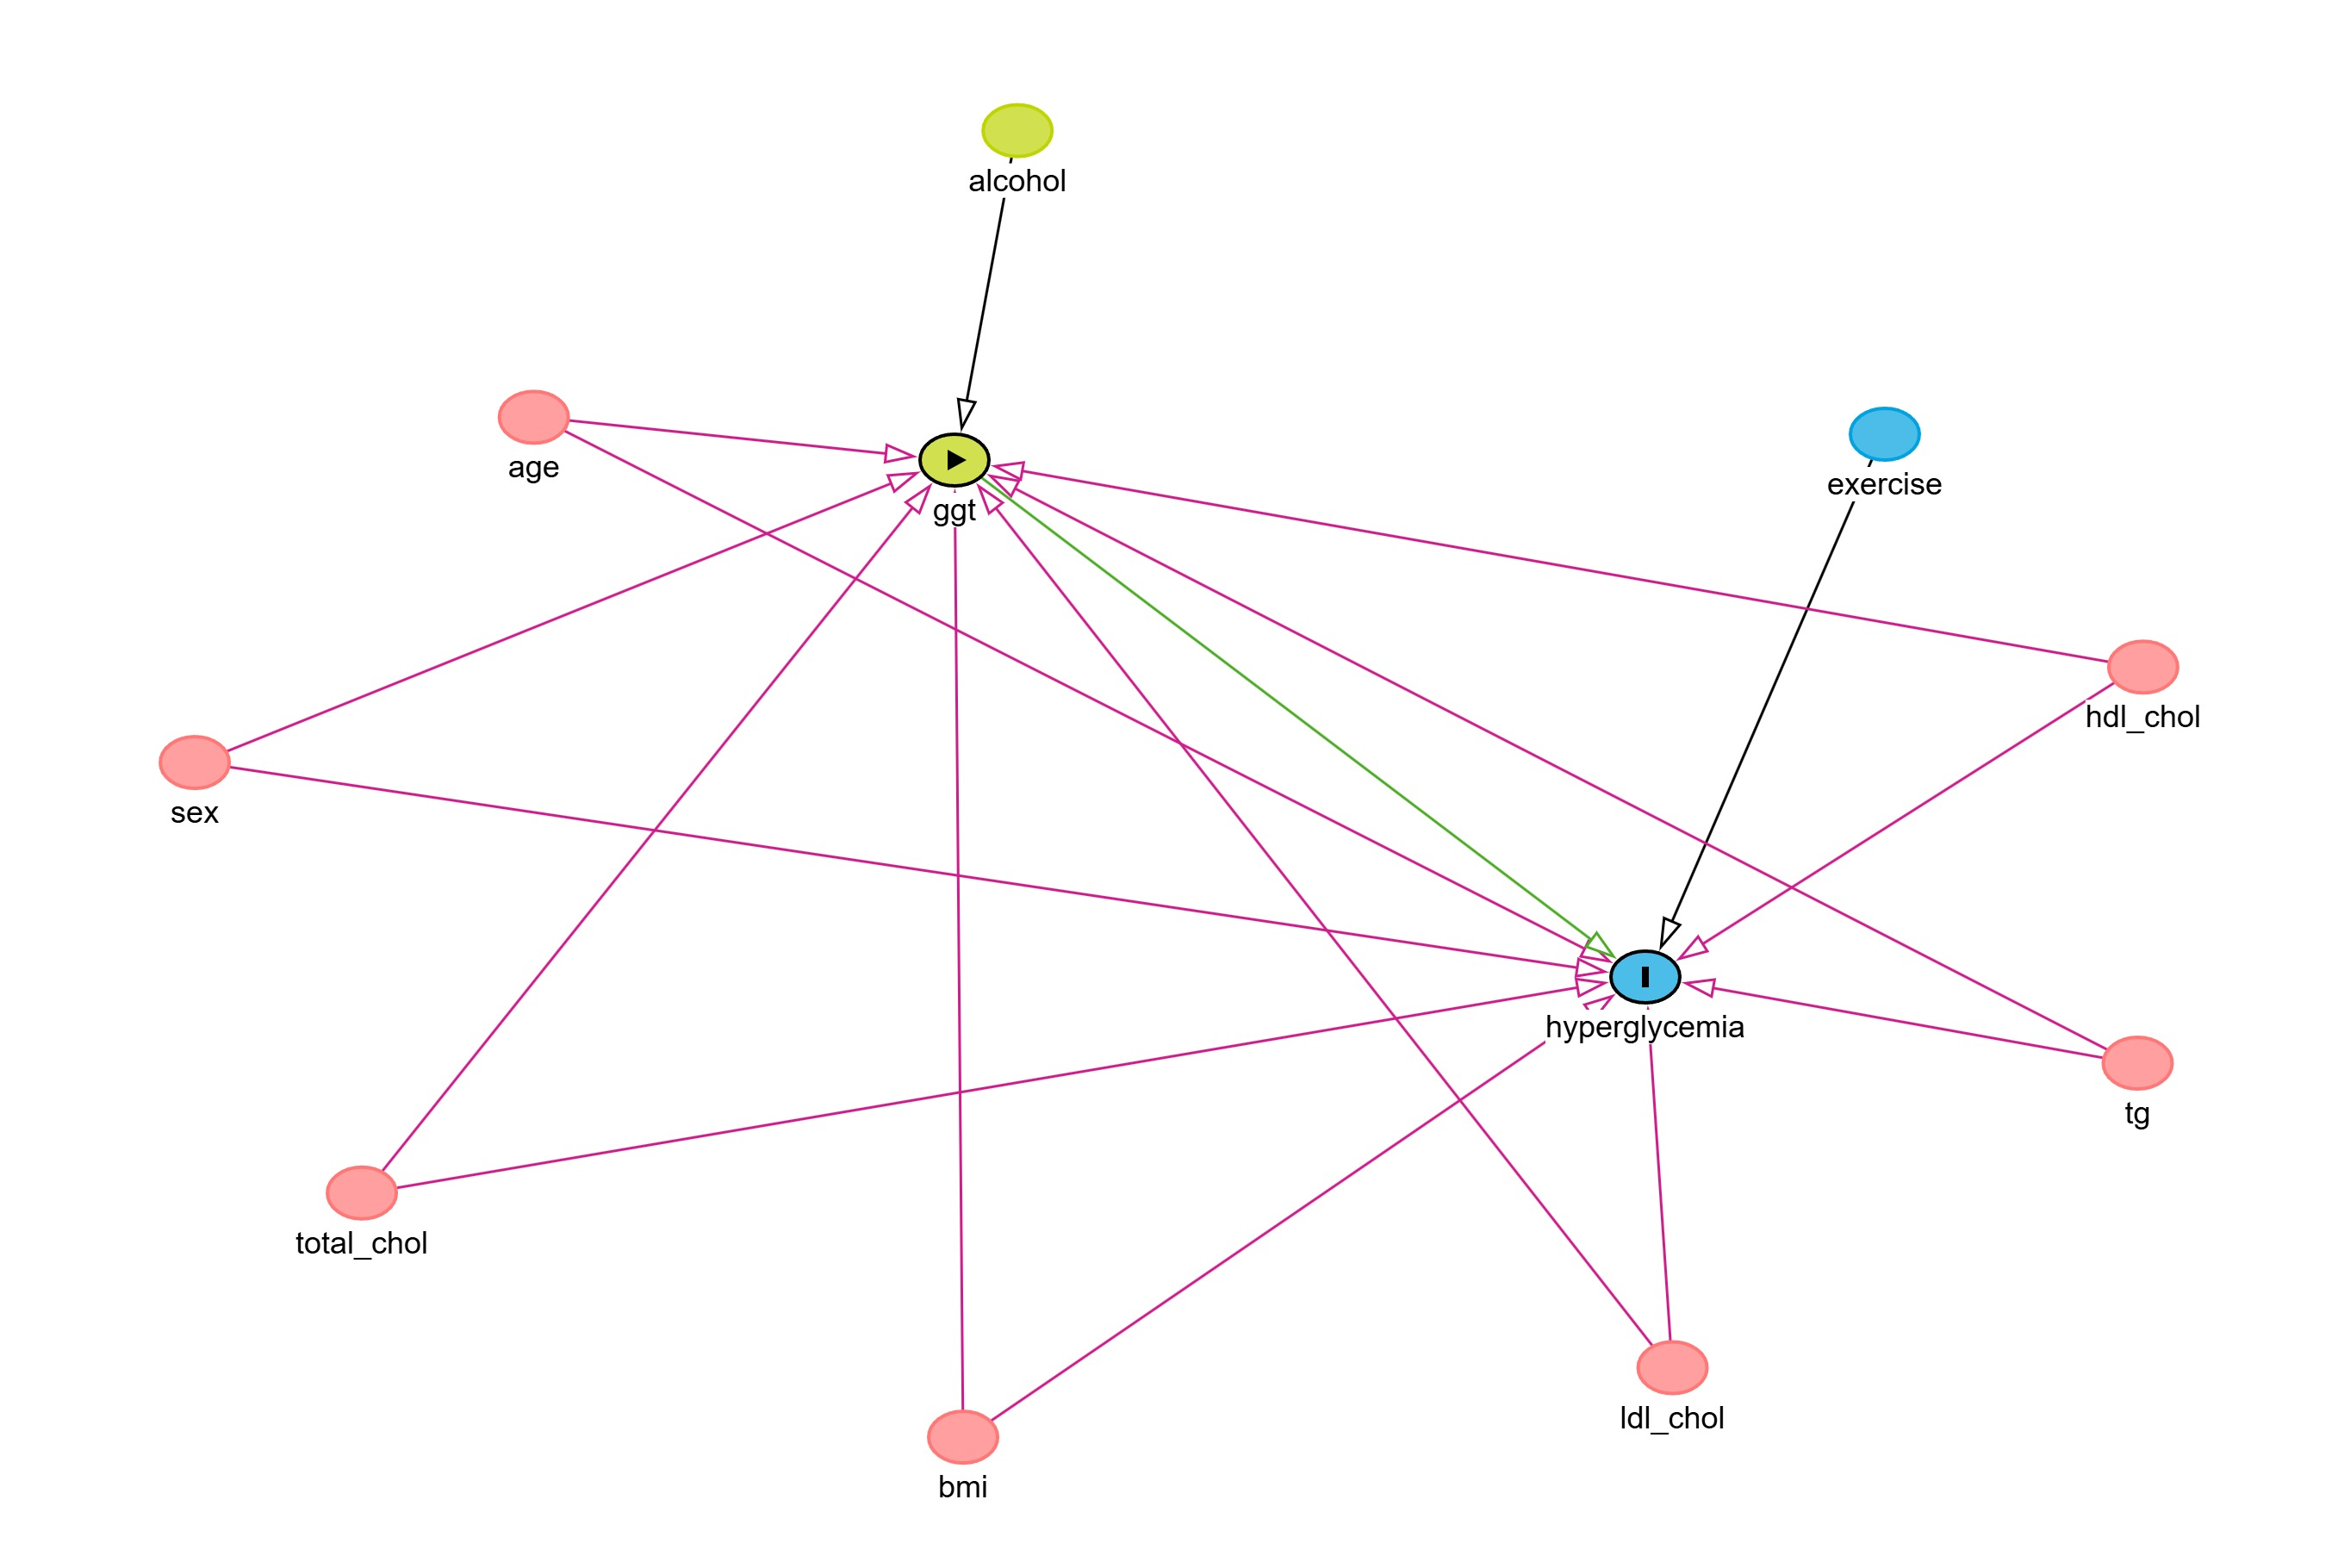

##### ♦ PC Algorithm

In [ ]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz

cg_pc = pc(data, fisherz, alpha=0.05)
GraphUtils.to_pydot(cg_pc.G, labels=cols).write_png("pc.png")

##### ♦ GES (Greedy Equivalence Search)

In [ ]:
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils

cg_ges = ges(data)
GraphUtils.to_pydot(cg_ges['G'], labels=cols).write_png("ges.png")

##### ♦ DirectLINGAM

In [ ]:
from lingam import DirectLiNGAM
import networkx as nx

model = DirectLiNGAM()
model.fit(data)

adj_matrix = model.adjacency_matrix_
G = nx.DiGraph(adj_matrix)
nx.relabel_nodes(G, dict(enumerate(cols)), copy=False)
nx.write_graphml(G, "lingam.graphml")

##### ♦ NOTEARS

In [ ]:
import numpy as np
from notears.linear import notears_linear
import networkx as nx
import matplotlib.pyplot as plt

# NOTEARS 실행
W_est = notears_linear(X, lambda1=0.01)

# 결과 확인
print("인과 구조 가중치 행렬 (W):")
print(W_est)

### E-value

### Sensitivity Analysis

### Discussion
    Drink가 0,1로 분류되는 자체에 의문이 있는데. 비음주와 음주가 어떻게 구분되었는가?
    무슨 기준으로 비음주와 음주를 나눌 수 있을지...

    한정된 검진자료를 기반으로 분석하였기에 unmeasured confounder 내재 가능성 존재